# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense 
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

%matplotlib inline

# Uploading the Main Dataset for Load Status Prediction

In [4]:
loan_prime_df1 = pd.read_csv('E:\LTU\Data Science\DS Project\Loan Defraud Prediction\Data Set\credit_train.csv')

# Exploring the Data Set

## Type of Data Set

In [5]:
type(loan_prime_df1)

pandas.core.frame.DataFrame

## Describing the Data Set

In [6]:
loan_prime_df1.describe

<bound method NDFrame.describe of                                      Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid         

## First Ten columns of Data Set

In [7]:
loan_prime_df1.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


## Shape of the Data Set

In [8]:
loan_prime_df1.shape

(100514, 19)

## Info of the Data Set

In [9]:
loan_prime_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

### Value counts of the 'Loan Status'

In [10]:
loan_prime_df1['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

### Value counts of the 'Term'

In [11]:
loan_prime_df1['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

### Value counts of the 'Years in current job'

In [12]:
loan_prime_df1['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

### Value counts of the "Home Ownership"

In [13]:
loan_prime_df1['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

### Value counts of the 'Purpose'

In [14]:
loan_prime_df1['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

# Visualizing the Data

## Visuals of Loan Status compared with Term

<AxesSubplot:xlabel='Term', ylabel='count'>

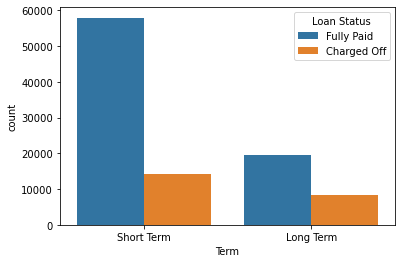

In [15]:
sns.countplot(x='Term',hue='Loan Status',data=loan_prime_df1)

## Visula of 'Time Period of Loans'

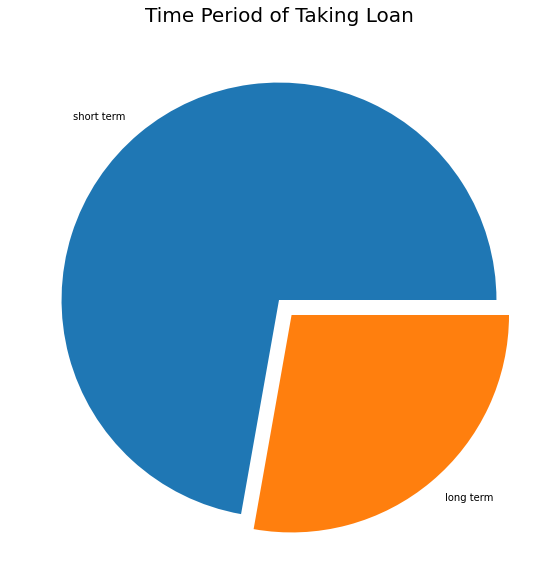

In [16]:
plt.figure(figsize=(10,10))
plt.pie(x=loan_prime_df1['Term'].value_counts(),labels=['short term','long term'],explode=[0,0.09],)
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()

## Visuals of Home Ownership compared with Loan Status

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

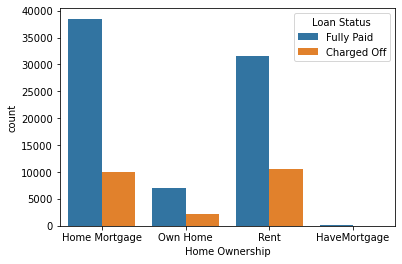

In [17]:
sns.countplot(x='Home Ownership',hue='Loan Status',data=loan_prime_df1)

### Visuals of 'Loan Status' compared with 'Years in Job'

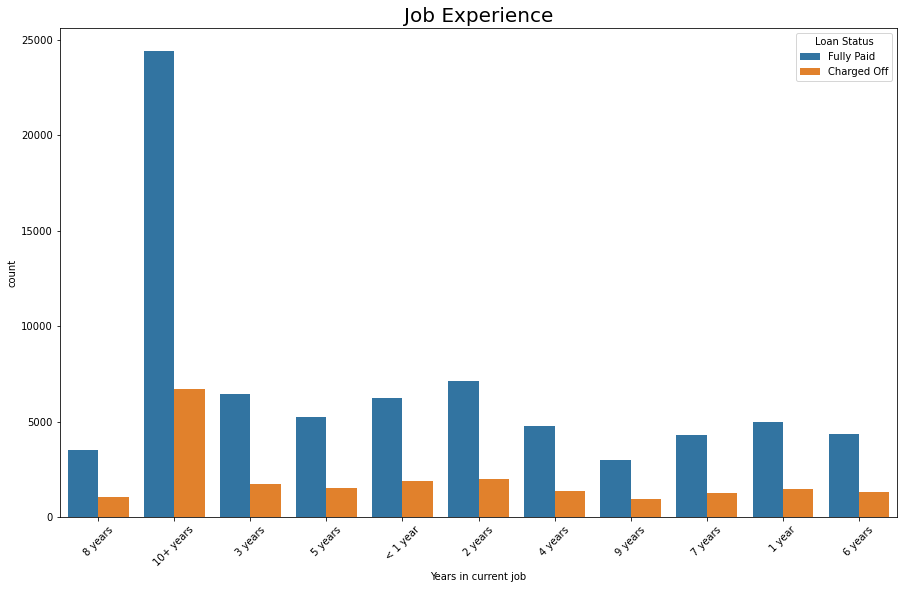

In [18]:
plt.figure(figsize=(15,9))
sns.countplot(x='Years in current job',data=loan_prime_df1,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Job Experience',fontdict={'fontsize':20})
plt.show()

## Visauls of 'Number of Credit Problems' with 'Loan Status'

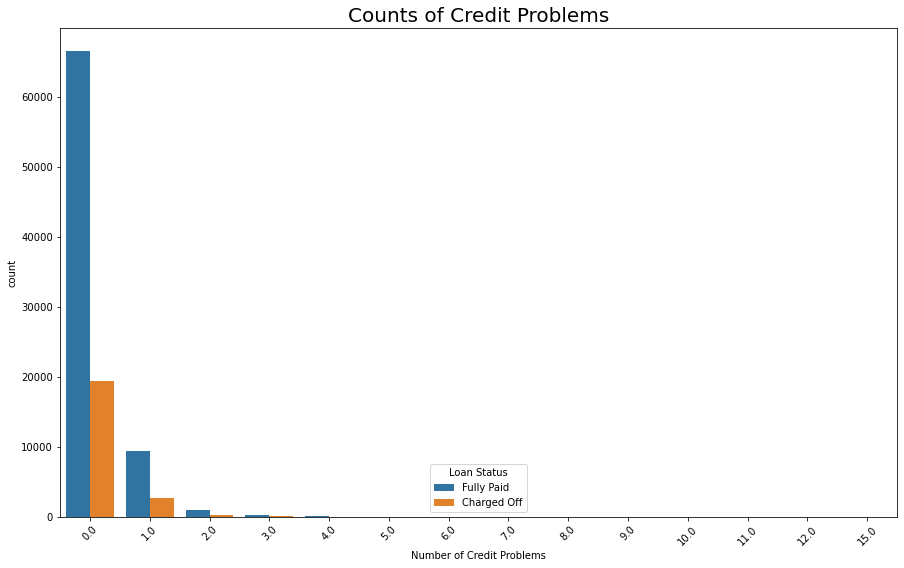

In [19]:
plt.figure(figsize=(15,9))
sns.countplot(x='Number of Credit Problems',data=loan_prime_df1,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Counts of Credit Problems',fontdict={'fontsize':20})
plt.show()

## Visuals of 'Purporse of Taking Loan' with Loan Status

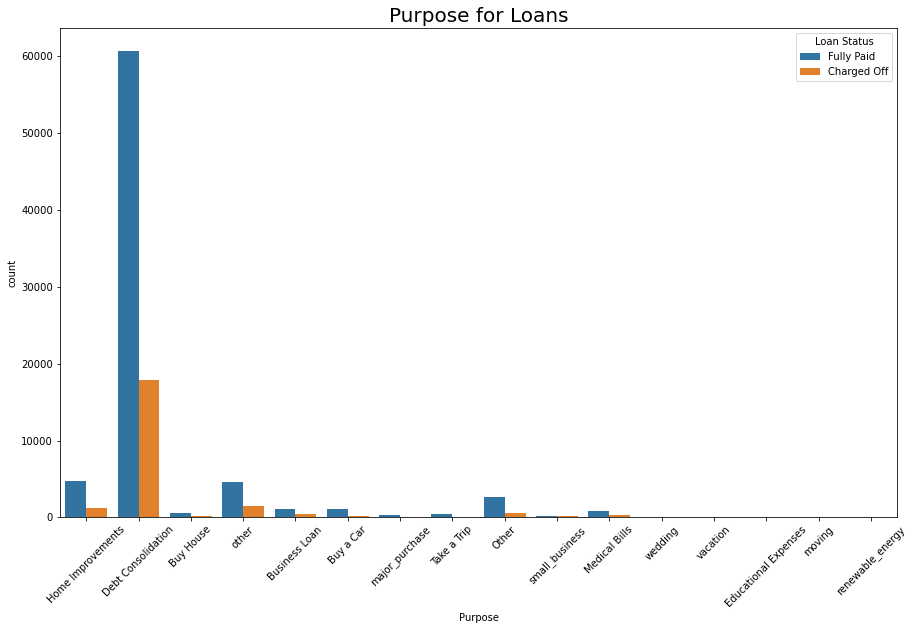

In [20]:
plt.figure(figsize=(15,9))
sns.countplot(x='Purpose',data=loan_prime_df1,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Purpose for Loans',fontdict={'fontsize':20})
plt.show()

## Viusals of comparing Montly Debts with Tax Liens

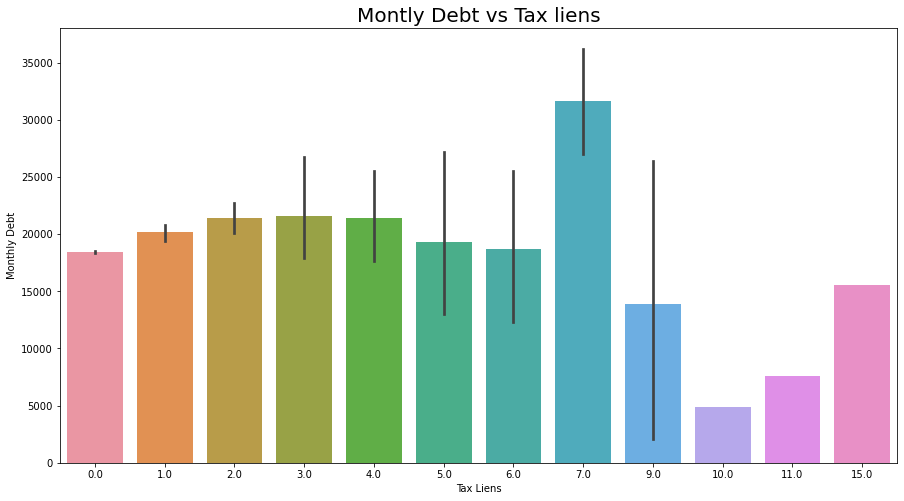

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x=loan_prime_df1['Tax Liens'],y=loan_prime_df1['Monthly Debt'])
plt.title('Montly Debt vs Tax liens',fontdict={'fontsize':20})
plt.show()

## Visuals of Bankruptcy comparing with Monthly Debts

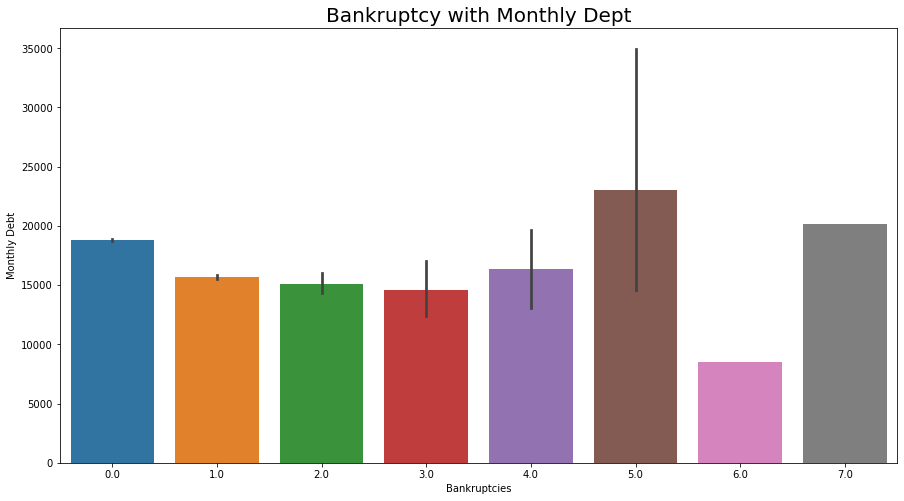

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x=loan_prime_df1['Bankruptcies'],y=loan_prime_df1['Monthly Debt'])
plt.title('Bankruptcy with Monthly Dept',fontdict={'fontsize':20})
plt.show()

# Data Cleansing

In [4]:
loan_prime_df1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Checking NA/ Null Values

In [5]:
loan_prime_df1.isnull().head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False


In [6]:
loan_prime_df1.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

<AxesSubplot:>

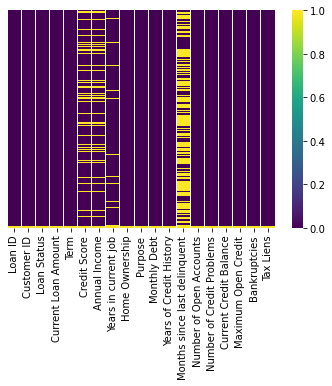

In [7]:
sns.heatmap(loan_prime_df1.isnull(), yticklabels=False, cmap='viridis')

## Dropping Unused Data & Filling NA / Null Values

In [8]:
loan_prime_df1 = loan_prime_df1.dropna()

In [9]:
loan_prime_df1.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [10]:
loan_prime_df1.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,578c8e10-3214-4491-bdbc-b1695ef8ff87,cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66,Fully Paid,465410.0,Long Term,688.0,1722654.0,3 years,Rent,Buy House,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
28,ccc6dadf-7530-4ca6-a679-a228ae478b5d,689da294-ff83-4d49-986a-c61887f6d4e2,Fully Paid,99999999.0,Short Term,746.0,1749748.0,10+ years,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0


In [11]:
loan_prime_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36423 non-null  object 
 1   Customer ID                   36423 non-null  object 
 2   Loan Status                   36423 non-null  object 
 3   Current Loan Amount           36423 non-null  float64
 4   Term                          36423 non-null  object 
 5   Credit Score                  36423 non-null  float64
 6   Annual Income                 36423 non-null  float64
 7   Years in current job          36423 non-null  object 
 8   Home Ownership                36423 non-null  object 
 9   Purpose                       36423 non-null  object 
 10  Monthly Debt                  36423 non-null  float64
 11  Years of Credit History       36423 non-null  float64
 12  Months since last delinquent  36423 non-null  float64
 13  N

## Label Enconding: Obejct Data type  >  Ineteger

In [12]:
# convert categorical columns to numerical values
# Fully Paid- 0 . Charged off - 1
# Short Term-0 . Long term-1 
# < 1 year = 0, 1 year = 1 , 2 years= 2 , 3 years = 3, 4 years = 4 , 5 years = 5 , 6 years = 6 , 7 years = 7 , 8 years = 8 , 9 years = 9, 10+ years = 10
# Home Mortgage = 0, Rent = 1, Own Home = 2 , Have Morgage = 3 
#'Debt Consolidation':0,'other':1 , 'Home Improvements':2, 'Other':3, 'Business Loan':4, 'Buy a Car':5, 'Medical Bills':6, 'Buy House': 7, 'Take a Trip':8, 'small_business':9,'moving':10, 
#'wedding':11, 'vacation':12, 'Educational Expenses':13, 'renewable_energy':14 



In [13]:
# convert categorical columns to numerical values
loan_prime_df1.replace({'Loan Status': {'Fully Paid':0,'Charged Off':1}, 'Term':{'Short Term':0, 'Long Term':1}, 'Years in current job':{'< 1 year':0, '1 year': 1 , '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6 ,'7 years':7 , '8 years':8, '9 years':9, '10+ years':10 },'Home Ownership':{'Home Mortgage':0, 'Rent':1, 'Own Home':2, 'HaveMortgage': 3} },inplace=True)

In [14]:
loan_prime_df1.replace({'Purpose': {'Debt Consolidation':0,'other':1 , 'Home Improvements':2, 'Other':3, 'Business Loan':4, 'Buy a Car':5, 'Medical Bills':6, 'Buy House': 7, 'Take a Trip':8, 'small_business':9,'moving':10, 'wedding':11, 'vacation':12, 'Educational Expenses':13, 'renewable_energy':14, 'major_purchase':15   }  },inplace=True)

In [15]:
loan_prime_df1['Purpose'].value_counts()

0     28202
2      2409
1      2313
3      1150
4       596
6       444
5       428
7       263
8       219
15      116
9       111
10       55
12       41
11       39
13       33
14        4
Name: Purpose, dtype: int64

# Dropping Invalid Columns for Training

In [16]:
loan_prime_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36423 non-null  object 
 1   Customer ID                   36423 non-null  object 
 2   Loan Status                   36423 non-null  int64  
 3   Current Loan Amount           36423 non-null  float64
 4   Term                          36423 non-null  int64  
 5   Credit Score                  36423 non-null  float64
 6   Annual Income                 36423 non-null  float64
 7   Years in current job          36423 non-null  int64  
 8   Home Ownership                36423 non-null  int64  
 9   Purpose                       36423 non-null  int64  
 10  Monthly Debt                  36423 non-null  float64
 11  Years of Credit History       36423 non-null  float64
 12  Months since last delinquent  36423 non-null  float64
 13  N

In [17]:
loan_prime_df1.drop('Loan ID', axis=1, inplace=True)

In [18]:
loan_prime_df1.drop('Customer ID', axis=1, inplace=True)

In [22]:
loan_prime_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   36423 non-null  int64  
 1   Current Loan Amount           36423 non-null  float64
 2   Term                          36423 non-null  int64  
 3   Credit Score                  36423 non-null  float64
 4   Annual Income                 36423 non-null  float64
 5   Years in current job          36423 non-null  int64  
 6   Home Ownership                36423 non-null  int64  
 7   Purpose                       36423 non-null  int64  
 8   Monthly Debt                  36423 non-null  float64
 9   Years of Credit History       36423 non-null  float64
 10  Months since last delinquent  36423 non-null  float64
 11  Number of Open Accounts       36423 non-null  float64
 12  Number of Credit Problems     36423 non-null  float64
 13  C

## Making Data Frames for different algorithms

### Exporting Clean Dataset

In [20]:
loan_prime_df1.to_csv(r'E:\LTU\Data Science\DS Project\Data Frames for algotithms\Cleaned Data.csv')

### Random Forest - Data Frame

In [22]:
loan_df_RF = pd.read_csv(r'E:\LTU\Data Science\DS Project\Data Frames for algotithms\Cleaned Data.csv')

### Artificial Neural Network - Data Frame

In [40]:
loan_df_ANN = pd.read_csv(r'E:\LTU\Data Science\DS Project\Data Frames for algotithms\Cleaned Data.csv')

# Spliting Data Sets for Training 

In [41]:
#RF

In [42]:
X_rf = loan_df_RF.drop(columns=['Loan Status'],axis=1)
y_rf = loan_df_RF['Loan Status']

In [45]:
#ANN 

In [46]:
X_ann = loan_df_ANN.drop(columns=['Loan Status'],axis=1)
y_ann = loan_df_ANN['Loan Status']

# Training & Testing

## Random Forest - Algorithm 

In [88]:
loan_df_RF.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,99999999,0,741,2231892,8,2,0,29200.53,14.9,29,18,1,297996,750090,0,0
1,0,217646,0,730,1184194,0,0,0,10855.08,19.6,10,13,1,122170,272052,1,0
2,0,548746,0,678,2559110,2,1,0,18660.28,22.6,33,4,0,437171,555038,0,0
3,0,99999999,0,728,714628,3,1,0,11851.06,16.0,76,16,0,203965,289784,0,0
4,0,99999999,0,740,776188,0,2,0,11578.22,8.5,25,6,0,134083,220220,0,0


In [89]:
#Allocating dataframe 

In [90]:
X_rf = loan_df_RF.iloc[:, 0:7].values
y_rf = loan_df_RF.iloc[:, 2].values

In [91]:
#Test Split Dataframe for RF

In [92]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)

In [93]:
#Importing Standard Scaler library 

In [94]:
from sklearn.preprocessing import StandardScaler

SSL = StandardScaler()
X_rf_train = SSL.fit_transform(X_rf_train)
X_rf_test = SSL.transform(X_rf_test)

In [95]:
#Importing Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=20, random_state=0)
RFR.fit(X_rf_train, y_rf_train)
y_pred = RFR.predict(X_rf_test)

In [97]:
#Checking Accuracy of Random Forest Model

In [98]:
AS=accuracy_score(y_rf_test, y_pred)
print(AS)
print ("\nAccuracy: " + "{:.0%}".format(AS))

1.0

Accuracy: 100%


In [99]:
#Confusion Matrix of RF Model

In [100]:
cm = metrics.confusion_matrix(y_rf_test, y_pred)
print(cm)

[[5128    0]
 [   0 2157]]


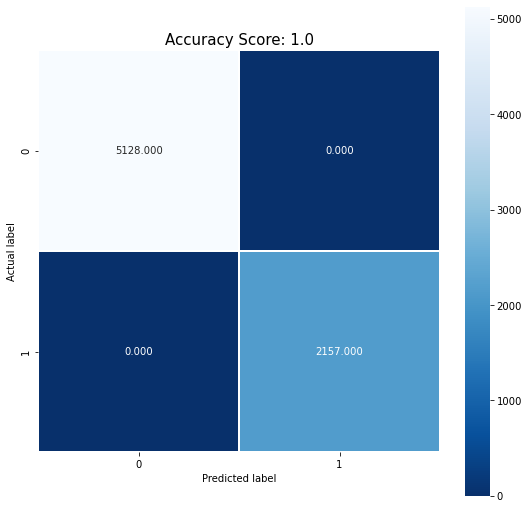

In [101]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(AS)
plt.title(all_sample_title, size = 15);

# --------------------------------------------------------------------

# Artificial Neural Network - Algorithm

In [102]:
loan_df_ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   36423 non-null  int64  
 1   Current Loan Amount           36423 non-null  int64  
 2   Term                          36423 non-null  int64  
 3   Credit Score                  36423 non-null  int64  
 4   Annual Income                 36423 non-null  int64  
 5   Years in current job          36423 non-null  int64  
 6   Home Ownership                36423 non-null  int64  
 7   Purpose                       36423 non-null  int64  
 8   Monthly Debt                  36423 non-null  float64
 9   Years of Credit History       36423 non-null  float64
 10  Months since last delinquent  36423 non-null  int64  
 11  Number of Open Accounts       36423 non-null  int64  
 12  Number of Credit Problems     36423 non-null  int64  
 13  C

In [103]:
#Spliting data frame for Train & Test

In [104]:
X_ann_train, X_ann_test, y_ann_train, y_ann_test = train_test_split(X_ann,y_ann,test_size=0.2,random_state=5)

In [106]:
#Create ANN Model using Keras 

In [107]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Run Neural Network Model 

In [110]:
model.fit(X_ann_train, y_ann_train, epochs=100)

Epoch 1/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950: 0s - loss: 0.4758 - ac
Epoch 2/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950: 0s - loss: 0.4736 - ac
Epoch 3/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4735 - accuracy: 0.7950
Epoch 4/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950: 0s - loss: 0.4 - ETA: 0s - loss: 0.4735 - accuracy: 
Epoch 5/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4735 - accuracy: 0.7950: 0s - loss: 0.4739 - accuracy: 
Epoch 6/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950
Epoch 7/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950
Epoch 8/100
911/911 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7950: 0s - loss: 0.4743 - accura
Epoch 9/100
911/911 [=========

In [111]:
#Evaluating the Model

In [112]:
model.evaluate(X_ann_test, y_ann_test)

228/228 [==============================] - 0s 829us/step - loss: 0.4712 - accuracy: 0.7974


[0.47123897075653076, 0.7973918914794922]

In [113]:
#Checking the Prediction

In [114]:
yp = model.predict(X_ann_test)
yp[:5]

array([[0.23527995],
       [0.23527995],
       [0.23527995],
       [0.23527995],
       [0.23527995]], dtype=float32)

In [115]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [116]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [117]:
y_ann_test[:10]

17858    0
3904     0
13127    1
9601     0
12972    0
32933    0
12228    0
27271    0
4551     0
5593     0
Name: Loan Status, dtype: int64

In [118]:
#Print the Classification Report

In [120]:
print(classification_report(y_ann_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5809
           1       0.00      0.00      0.00      1476

    accuracy                           0.80      7285
   macro avg       0.40      0.50      0.44      7285
weighted avg       0.64      0.80      0.71      7285



C:\Users\User-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# Accuracy Result of ANN

In [122]:
AS=accuracy_score(y_ann_test, y_pred)
print(AS)
print ("\nAccuracy: " + "{:.0%}".format(AS))

0.797391901166781

Accuracy: 80%


In [123]:
#Confusion Matrix of ANN

In [124]:
cm = metrics.confusion_matrix(y_ann_test, y_pred)
print(cm)

[[5809    0]
 [1476    0]]


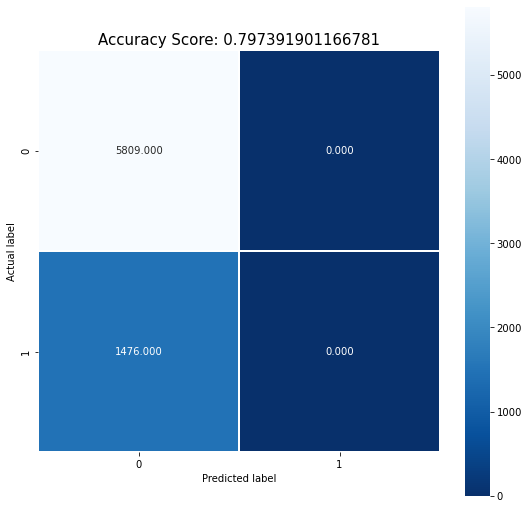

In [125]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(AS)
plt.title(all_sample_title, size = 15);

# --------------------------------------------------------------------